# Disposition Prediction - Fastai Machine Learning - 2 - Full Table

Question: Is it possible to build a machine learning model to predict KOI disposition and use more data fields to improve upon previous 83% accuracy?

Answer: Using the full dataset, was able to increase from 83.3% -> 89.6% accuracy 

In [1]:
# Python imports and settings
import numpy  as np
import pandas as pd
import seaborn as sns
import scipy.stats
import re
from pydash import py_ as _
from sklearn.preprocessing import OneHotEncoder

from src.dataset_koi import koi, koi_columns, koi_column_types
from src.utilities import onehot_encode_comments

# https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns-of-a-pandas-dataframe
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
pd.set_option('display.max_rows', 8)  # 8 is required for .describe()

%load_ext autoreload
%autoreload 2

In [2]:
import random
import fastai
from fastai.basic_data import DatasetType
from fastai.tabular.data import TabularDataBunch, TabularList
from fastai.tabular.transform import FillMissing, Categorify, Normalize
from fastai.tabular.learner import tabular_learner
from fastai.metrics import accuracy, r2_score, root_mean_squared_error, mean_squared_logarithmic_error
from fastai.data_block import FloatList

## Load Dataset

In [3]:
dataset        = koi['all']; 
onehot_dataset = (
    pd.concat([ 
        # koi['id'],         
        koi['archive'], 
        koi['disposition'], 
        koi['transit'], 
        koi['TCE'], 
        koi['stellar'], 
        koi['KIC'], 
        koi['pixels'],         

        # pd.get_dummies(dataset[['koi_disposition']]),
        # pd.get_dummies(dataset[['koi_fittype']]),
        # pd.get_dummies(dataset[['koi_tce_delivname']]),
        onehot_encode_comments(dataset, 'koi_comment', '---', without=['NO_COMMENT']).astype('int32'),
    ], axis=1)
)
onehot_dataset

,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_comment,koi_period,koi_time0bk,koi_time0,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_fittype,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff1,koi_ldm_coeff2,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_fwm_stat_sig,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky,koi_comment_ALL_TRANS_CHASES,koi_comment_ALT_ROBO_ODD_EVEN_TEST_FAIL,koi_comment_ALT_SEC_SAME_DEPTH_AS_PRI_COULD_BE_TWICE_TRUE_PERIOD,koi_comment_ALT_SIG_PRI_MINUS_SIG_POS_TOO_LOW,koi_comment_ALT_SIG_PRI_MINUS_SIG_TER_TOO_LOW,koi_comment_ALT_SIG_PRI_OVER_FRED_TOO_LOW,koi_comment_CENTROID_SIGNIF_UNCERTAIN,koi_comment_CENT_CROWDED,koi_comment_CENT_FEW_DIFFS,koi_comment_CENT_FEW_MEAS,koi_comment_CENT_KIC_POS,koi_comment_CENT_NOFITS,koi_comment_CENT_RESOLVED_OFFSET,koi_comment_CENT_SATURATED,koi_comment_CENT_UNCERTAIN,koi_comment_CENT_UNRESOLVED_OFFSET,koi_comment_CLEAR_APO,koi_comment_CROWDED_DIFF,koi_comment_DEEP_V_SHAPED,koi_comment_DEPTH_ODDEVEN_ALT,koi_comment_DEPTH_ODDEVEN_DV,koi_comment_DV_SIG_PRI_MINUS_SIG_POS_TOO_LOW,koi_comment_DV_SIG_PRI_OVER_FRED_TOO_LOW,koi_comment_EPHEM_MATCH,koi_comment_EYEBALL,koi_comment_FIT_FAILED,koi_comment_HALO_GHOST,koi_comment_HAS_SEC_TCE,koi_comment_INCONSISTENT_TRANS,koi_comment_INDIV_TRANS_CHASES,koi_comment_INDIV_TRANS_CHASES_MARSHALL,koi_comment_INDIV_TRANS_CHASES_MARSHALL_SKYE,koi_comment_INDIV_TRANS_CHASES_MARSHALL_ZUMA,koi_comment_INDIV_TRANS_CHASES_SKYE,koi_comment_INDIV_TRANS_MARSHALL,koi_comment_INDIV_TRANS_MARSHALL_SKYE,koi_comment_INDIV_TRANS_MARSHALL_ZUMA,koi_comment_INDIV_TRANS_RUBBLE,koi_comment_INDIV_TRANS_RUBBLE_MARSHALL_SKYE,koi_comment_INDIV_TRANS_RUBBLE_SKYE,koi_comment_INDIV_TRANS_RUBBLE_SKYE_ZUMA,koi_comment_INDIV_TRANS_RUBBLE_SKYE_ZUMA_TRACKER,koi_comment_INDIV_TRANS_SKYE,koi_comment_INDIV_TRANS_SKYE_ZUMA,koi_comment_INDIV_TRANS_SKYE_ZUMA_TRACKER,koi_comment_INDIV_TRANS_ZUMA,koi_comment_INVERT_DIFF,koi_comment_IS_SEC_TCE,koi_comment_KIC_OFFSET,koi_comment_LPP_ALT,koi_comment_LPP_ALT_TOO_HIGH,koi_comment_LPP_DV,koi_comment_LPP_DV_TOO_HIGH,koi_comment_MARSHALL_FAIL,koi_comment_MOD_NONUNIQ_ALT,koi_comment_MOD_NONUNIQ_DV,koi_comment_MOD_ODDEVEN_ALT,koi_comment_MOD_ODDEVEN_DV,koi_comment_MOD_POS_ALT,koi_comment_MOD_POS_DV,koi_comment_MOD_SEC_ALT,koi_comment_MOD_SEC_DV,koi_comment_MOD_TER_ALT,koi_comment_MOD_TER_DV,koi_comment_OTHER_TCE_AT_SAME_PERIOD_DIFF_EPOCH,koi_comment_PARENT_IS_002305372-pri,koi_comment_PARENT_IS_002449084-pri,koi_comment_PARENT_IS_003352751-pri,koi_comment_PARENT_IS_003858884-01,koi_comment_PARENT_IS_004482641-01,koi_comment_PARENT_IS_005024292-01,koi_comment_PARENT_IS_005036538-01,koi_comment_PARENT_IS_005343976-pri,koi_comment_PARENT_IS_005471619-pri,koi_comment_PARENT_IS_005513861-pri,koi_comment_PARENT_IS_006367628-pri,koi_comment_PARENT_IS_007258889-pri,koi_comment_PARENT_IS_007598128-pri,koi_comment_PARENT_IS_008265951-pri,koi_comment_PARENT_IS_008380743-pri,koi_comment_PARENT_IS_009541127-pri,koi_comment_PARENT_IS_009777062-01,koi_comment_PARENT_IS_010485137-pri,koi_comment_PARENT_IS_010858720-pri,koi_comment_PARENT_IS_012004679-pri,koi_comment_PARENT_IS_3597.01,koi_comment_PARENT_IS_3895.01,koi_comment_PARENT_IS_4673.01,koi_comment_PARENT_IS_489.01,koi_comment_PARENT_IS_5335.01,koi_comment_PARENT_IS_970.01,koi_comment_PARENT_IS_FL-Lyr-pri,koi_comment_PARENT_IS_RR-Lyr-pri,koi_comment_PARENT_IS_UZ-Lyr-pri,koi_comment_PARENT_IS_V2277-Cyg-pri,koi_comment_PARENT_IS_V380-Cyg-pri,koi_comment_PARENT_IS_V380-Cyg-sec,koi_comment_PARENT_IS_V850-Cyg-pri,koi_comment_PERIOD_ALIAS_ALT,koi_comment_PERIOD_ALIAS_DV,koi_comme

In [4]:
ml_dataset = (
    onehot_dataset
        .drop(columns=[
            'kepid','kepoi_star','kepoi_name','kepler_name','koi_pdisposition','koi_comment','koi_quarters','koi_sparprov',
            'koi_kepmag', 'koi_fittype', 'koi_tce_delivname',  # unencoded categorical columns
        ], errors='ignore')        
        .reset_index()    
        .drop(columns=['kepoi_name'])        
)
ml_dataset

,koi_disposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff1,koi_ldm_coeff2,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,ra,dec,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_fwm_stat_sig,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky,koi_comment_ALL_TRANS_CHASES,koi_comment_ALT_ROBO_ODD_EVEN_TEST_FAIL,koi_comment_ALT_SEC_SAME_DEPTH_AS_PRI_COULD_BE_TWICE_TRUE_PERIOD,koi_comment_ALT_SIG_PRI_MINUS_SIG_POS_TOO_LOW,koi_comment_ALT_SIG_PRI_MINUS_SIG_TER_TOO_LOW,koi_comment_ALT_SIG_PRI_OVER_FRED_TOO_LOW,koi_comment_CENTROID_SIGNIF_UNCERTAIN,koi_comment_CENT_CROWDED,koi_comment_CENT_FEW_DIFFS,koi_comment_CENT_FEW_MEAS,koi_comment_CENT_KIC_POS,koi_comment_CENT_NOFITS,koi_comment_CENT_RESOLVED_OFFSET,koi_comment_CENT_SATURATED,koi_comment_CENT_UNCERTAIN,koi_comment_CENT_UNRESOLVED_OFFSET,koi_comment_CLEAR_APO,koi_comment_CROWDED_DIFF,koi_comment_DEEP_V_SHAPED,koi_comment_DEPTH_ODDEVEN_ALT,koi_comment_DEPTH_ODDEVEN_DV,koi_comment_DV_SIG_PRI_MINUS_SIG_POS_TOO_LOW,koi_comment_DV_SIG_PRI_OVER_FRED_TOO_LOW,koi_comment_EPHEM_MATCH,koi_comment_EYEBALL,koi_comment_FIT_FAILED,koi_comment_HALO_GHOST,koi_comment_HAS_SEC_TCE,koi_comment_INCONSISTENT_TRANS,koi_comment_INDIV_TRANS_CHASES,koi_comment_INDIV_TRANS_CHASES_MARSHALL,koi_comment_INDIV_TRANS_CHASES_MARSHALL_SKYE,koi_comment_INDIV_TRANS_CHASES_MARSHALL_ZUMA,koi_comment_INDIV_TRANS_CHASES_SKYE,koi_comment_INDIV_TRANS_MARSHALL,koi_comment_INDIV_TRANS_MARSHALL_SKYE,koi_comment_INDIV_TRANS_MARSHALL_ZUMA,koi_comment_INDIV_TRANS_RUBBLE,koi_comment_INDIV_TRANS_RUBBLE_MARSHALL_SKYE,koi_comment_INDIV_TRANS_RUBBLE_SKYE,koi_comment_INDIV_TRANS_RUBBLE_SKYE_ZUMA,koi_comment_INDIV_TRANS_RUBBLE_SKYE_ZUMA_TRACKER,koi_comment_INDIV_TRANS_SKYE,koi_comment_INDIV_TRANS_SKYE_ZUMA,koi_comment_INDIV_TRANS_SKYE_ZUMA_TRACKER,koi_comment_INDIV_TRANS_ZUMA,koi_comment_INVERT_DIFF,koi_comment_IS_SEC_TCE,koi_comment_KIC_OFFSET,koi_comment_LPP_ALT,koi_comment_LPP_ALT_TOO_HIGH,koi_comment_LPP_DV,koi_comment_LPP_DV_TOO_HIGH,koi_comment_MARSHALL_FAIL,koi_comment_MOD_NONUNIQ_ALT,koi_comment_MOD_NONUNIQ_DV,koi_comment_MOD_ODDEVEN_ALT,koi_comment_MOD_ODDEVEN_DV,koi_comment_MOD_POS_ALT,koi_comment_MOD_POS_DV,koi_comment_MOD_SEC_ALT,koi_comment_MOD_SEC_DV,koi_comment_MOD_TER_ALT,koi_comment_MOD_TER_DV,koi_comment_OTHER_TCE_AT_SAME_PERIOD_DIFF_EPOCH,koi_comment_PARENT_IS_002305372-pri,koi_comment_PARENT_IS_002449084-pri,koi_comment_PARENT_IS_003352751-pri,koi_comment_PARENT_IS_003858884-01,koi_comment_PARENT_IS_004482641-01,koi_comment_PARENT_IS_005024292-01,koi_comment_PARENT_IS_005036538-01,koi_comment_PARENT_IS_005343976-pri,koi_comment_PARENT_IS_005471619-pri,koi_comment_PARENT_IS_005513861-pri,koi_comment_PARENT_IS_006367628-pri,koi_comment_PARENT_IS_007258889-pri,koi_comment_PARENT_IS_007598128-pri,koi_comment_PARENT_IS_008265951-pri,koi_comment_PARENT_IS_008380743-pri,koi_comment_PARENT_IS_009541127-pri,koi_comment_PARENT_IS_009777062-01,koi_comment_PARENT_IS_010485137-pri,koi_comment_PARENT_IS_010858720-pri,koi_comment_PARENT_IS_012004679-pri,koi_comment_PARENT_IS_3597.01,koi_comment_PARENT_IS_3895.01,koi_comment_PARENT_IS_4673.01,koi_comment_PARENT_IS_489.01,koi_comment_PARENT_IS_5335.01,koi_comment_PARENT_IS_970.01,koi_comment_PARENT_IS_FL-Lyr-pri,koi_comment_PARENT_IS_RR-Lyr-pri,koi_comment_PARENT_IS_UZ-Lyr-pri,koi_comment_PARENT_IS_V2277-Cyg-pri,koi_comment_PARENT_IS_V380-Cyg-pri,koi_comment_PARENT_IS_V380-Cyg-sec,koi_comment_PARENT_IS_V850-Cyg-pri,koi_comment_PERIOD_ALIAS_ALT,koi_comment_PERIOD_ALIAS_DV,koi_comment_PERIOD_ALIAS_IN_ALT_DATA_SEEN_AT_3:1,koi_comment_PERIOD_ALIAS_IN_DV_DATA_SEEN_AT_3:1,koi_comment_PLANET_I

In [5]:
ml_dataset.dtypes.koi_disposition  # fastai uses dtype to imply categorization (int, Categorical) vs regression (float)

CategoricalDtype(categories=['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], ordered=False)

## Define fastai ML model

In [6]:
valid_idx  = random.sample( ml_dataset.index.tolist(), len(ml_dataset)//5 )
cat_names  = ml_dataset['koi_disposition'].unique().tolist()
cont_names = _(ml_dataset.columns.tolist()).without('koi_disposition').value()  # important to exclude Y from X

In [7]:
# DOCS: https://docs.fast.ai/tabular.data.html#TabularDataBunch.from_df
databunch = TabularDataBunch.from_df(
    path='', 
    df=ml_dataset,
    test_df=onehot_dataset,
    dep_var='koi_disposition', 
    valid_idx=valid_idx,
    procs=[FillMissing, Categorify], 
#     cat_names=cat_names,
    cont_names=cont_names,    
)
assert( 'koi_disposition' not in databunch.train_ds.cont_names )

In [8]:
# learn.load('disposition_full')  # load previously saved model

In [9]:
# DOCS: https://docs.fast.ai/tabular.data.html#tabular_learner
learn = tabular_learner(
    data=databunch, 
    layers=[200, 200, 100, 100, 50, 50],
    metrics=[accuracy],                           
    wd=0.1,
    emb_drop=0.5,
)
# learn  # very verbose output

## Train Model

Use the learning rate finder, and pick a point on the main downward slope. A little experimention was required to obtain super-convergence without divergence.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


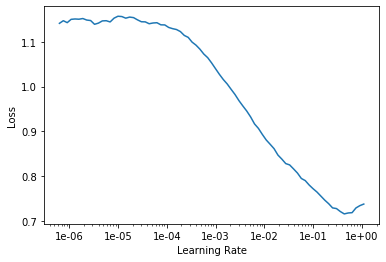

In [10]:
learn.lr_find()
learn.recorder.plot()

In [11]:
# learn.fit_one_cycle(20, 1e-3)  # [200, 200, 100, 100, 50, 50] wd=0.2 emb_drop=0.5  |  0.167876	0.441800	0.884881	00:09
learn.fit_one_cycle(5, 1e-3)     # [200, 200, 100, 100, 50, 50] wd=0.2 emb_drop=0.5  |  0.221434	0.299916	0.884414	00:09

epoch,train_loss,valid_loss,accuracy,time
0,0.516165,0.569104,0.812761,00:10
1,0.339800,0.681641,0.836297,00:10
2,0.273095,0.365272,0.855649,00:10
3,0.251879,0.386477,0.870816,00:10
4,0.221926,0.385040,0.867678,00:10


NOTE: it is important that the validation error continues to follow a general downward trend without diverging either upwards or too far from the training error. 

There is some overfitting here, but the overall result is reasonable.

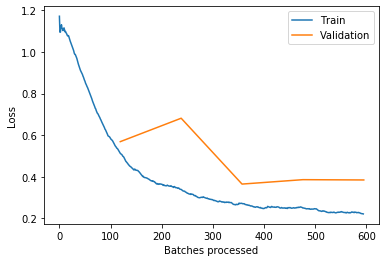

In [12]:
learn.recorder.plot_losses()

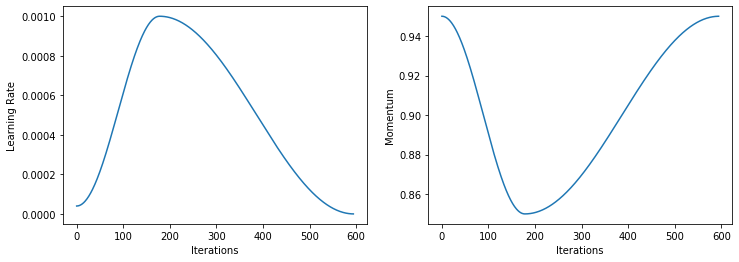

In [13]:
learn.recorder.plot_lr(show_moms=True)

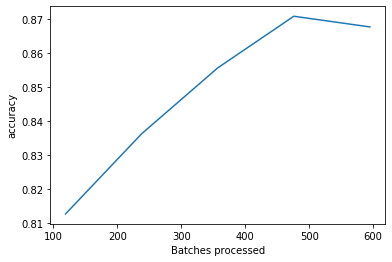

In [14]:
learn.recorder.plot_metrics()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


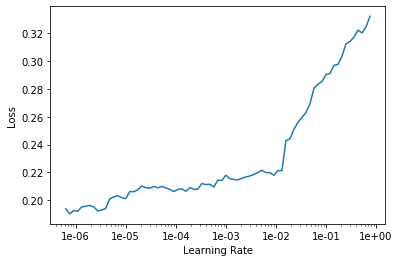

In [32]:
learn.lr_find()
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(1, 2e-6)  # continue manual training loop with lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.216624,0.408072,0.874477,00:10


In [36]:
# learn.load('disposition_full')
# learn.save('disposition_full')

In [16]:
### This method is horrendously slow 
# predictions = [ learn.predict(row)[0] for row in datalist ]  

## Generate Predictions

In [37]:
def label_predict(learn, preds):
    return [ learn.data.classes[np.argmax(pred)] for pred in preds ]

# HACK: Inject onehot_dataset in df_test, as learn.get_preds() is very much faster than learn.predict(row)[0]
predict, _     = learn.get_preds(ds_type=DatasetType.Test)
predict_labels = label_predict(learn, predict)
assert len(predict) == len(onehot_dataset)

onehot_dataset.drop('predict', axis=1, errors='ignore', inplace=True)
onehot_dataset.insert(1, 'predict', predict_labels)

In [38]:
accuracy = onehot_dataset.query('predict == koi_disposition').shape[0] / onehot_dataset.shape[0]

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(f'Accuracy: {round(accuracy*100, 2)}%' )
    print('\n----------\n')
    print('Confusion Matrix')
    display( onehot_dataset
            .sort_values(['predict', 'koi_disposition']) 
            .groupby(['predict', 'koi_disposition']) 
            .size()
    )    
    print('\n----------\n')
    print('Examples of each combination of true positive and false negative')
    display( onehot_dataset
            # .query('predict != koi_disposition')
            .sort_values(['predict', 'koi_disposition']) 
            .groupby(['predict', 'koi_disposition']) 
            .apply(lambda group:group.head(2))
   )

Accuracy: 89.6%

----------

Confusion Matrix


predict         koi_disposition
CANDIDATE       CANDIDATE          1851
                CONFIRMED          371 
                FALSE POSITIVE     15  
CONFIRMED       CANDIDATE          525 
                CONFIRMED          1921
                FALSE POSITIVE     29  
FALSE POSITIVE  CANDIDATE          44  
                CONFIRMED          11  
                FALSE POSITIVE     4797
dtype: int64


----------

Examples of each combination of true positive and false negative


kepler_name         predict koi_disposition koi_pdisposition  koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec                                                    koi_comment  koi_period  koi_time0bk    koi_time0  koi_impact  koi_duration  koi_depth   koi_ror  koi_srho koi_fittype  koi_prad  koi_sma  koi_incl  koi_teq  koi_insol  koi_dor  koi_ldm_coeff1  koi_ldm_coeff2  koi_max_sngle_ev  koi_max_mult_ev  koi_model_snr  koi_count  koi_num_transits  koi_tce_plnt_num koi_tce_delivname                      koi_quarters  koi_steff  koi_slogg  koi_smet  koi_srad  koi_smass koi_sparprov         ra        dec  koi_kepmag  koi_gmag  koi_rmag  koi_imag  koi_zmag  koi_jmag  koi_hmag  koi_kmag  koi_fwm_sra  koi_fwm_sdec  koi_fwm_srao  koi_fwm_sdeco  koi_fwm_prao  koi_fwm_pdeco  koi_fwm_stat_sig  koi_dicco_mra  koi_dicco_mdec  koi_dicco_msky  koi_dikco_mra  koi_dikco_mdec  koi_dikco_msky  koi_comment_ALL_TRANS_CHASES  koi_comment_ALT_ROBO_ODD_EVEN_TEST_FAIL  koi_comment_ALT_SEC_SAME_DEPTH_AS_PRI_COULD_BE_TWICE_TRUE_PERIOD  koi_comment_ALT_SIG_PRI_MINUS_SIG_POS_TOO_LOW  koi_comment_ALT_SIG_PRI_MINUS_SIG_TER_TOO_LOW  koi_comment_ALT_SIG_PRI_OVER_FRED_TOO_LOW  koi_comment_CENTROID_SIGNIF_UNCERTAIN  koi_comment_CENT_CROWDED  koi_comment_CENT_FEW_DIFFS  koi_comment_CENT_FEW_MEAS  koi_comment_CENT_KIC_POS  koi_comment_CENT_NOFITS  koi_comment_CENT_RESOLVED_OFFSET  koi_comment_CENT_SATURATED  koi_comment_CENT_UNCERTAIN  koi_comment_CENT_UNRESOLVED_OFFSET  koi_comment_CLEAR_APO  koi_comment_CROWDED_DIFF  koi_comment_DEEP_V_SHAPED  koi_comment_DEPTH_ODDEVEN_ALT  koi_comment_DEPTH_ODDEVEN_DV  koi_comment_DV_SIG_PRI_MINUS_SIG_POS_TOO_LOW  koi_comment_DV_SIG_PRI_OVER_FRED_TOO_LOW  koi_comment_EPHEM_MATCH  koi_comment_EYEBALL  koi_comment_FIT_FAILED  koi_comment_HALO_GHOST  koi_comment_HAS_SEC_TCE  koi_comment_INCONSISTENT_TRANS  koi_comment_INDIV_TRANS_CHASES  koi_comment_INDIV_TRANS_CHASES_MARSHALL  koi_comment_INDIV_TRANS_CHASES_MARSHALL_SKYE  koi_comment_INDIV_TRANS_CHASES_MARSHALL_ZUMA  koi_comment_INDIV_TRANS_CHASES_SKYE  koi_comment_INDIV_TRANS_MARSHALL  koi_comment_INDIV_TRANS_MARSHALL_SKYE  koi_comment_INDIV_TRANS_MARSHALL_ZUMA  koi_comment_INDIV_TRANS_RUBBLE  koi_comment_INDIV_TRANS_RUBBLE_MARSHALL_SKYE  koi_comment_INDIV_TRANS_RUBBLE_SKYE  koi_comment_INDIV_TRANS_RUBBLE_SKYE_ZUMA  koi_comment_INDIV_TRANS_RUBBLE_SKYE_ZUMA_TRACKER  koi_comment_INDIV_TRANS_SKYE  koi_comment_INDIV_TRANS_SKYE_ZUMA  koi_comment_INDIV_TRANS_SKYE_ZUMA_TRACKER  koi_comment_INDIV_TRANS_ZUMA  koi_comment_INVERT_DIFF  koi_comment_IS_SEC_TCE  koi_comment_KIC_OFFSET  koi_comment_LPP_ALT  koi_comment_LPP_ALT_TOO_HIGH  koi_comment_LPP_DV  koi_comment_LPP_DV_TOO_HIGH  koi_comment_MARSHALL_FAIL  koi_comment_MOD_NONUNIQ_ALT  koi_comment_MOD_NONUNIQ_DV  koi_comment_MOD_ODDEVEN_ALT  koi_comment_MOD_ODDEVEN_DV  koi_comment_MOD_POS_ALT  koi_comment_MOD_POS_DV  koi_comment_MOD_SEC_ALT  koi_comment_MOD_SEC_DV  koi_comment_MOD_TER_ALT  koi_comment_MOD_TER_DV  koi_comment_OTHER_TCE_AT_SAME_PERIOD_DIFF_EPOCH  koi_comment_PARENT_IS_002305372-pri  koi_comment_PARENT_IS_002449084-pri  koi_comment_PARENT_IS_003352751-pri  koi_comment_PARENT_IS_003858884-01  koi_comment_PARENT_IS_004482641-01  koi_comment_PARENT_IS_005024292-01  koi_comment_PARENT_IS_005036538-01  koi_comment_PARENT_IS_005343976-pri  koi_comment_PARENT_IS_005471619-pri  koi_comment_PARENT_IS_005513861-pri  koi_comment_PARENT_IS_006367628-pri  koi_comment_PARENT_IS_007258889-pri  koi_comment_PARENT_IS_007598128-pri  koi_comment_PARENT_IS_008265951-pri  koi_comment_PARENT_IS_008380743-pri  koi_comment_PARENT_IS_009541127-pri  koi_comment_PARENT_IS_009777062-01  koi_comment_PARENT_IS_010485137-pri  koi_comment_PARENT_IS_010858720-pri  koi_comment_PARENT_IS_012004679-pri  koi_comment_PARENT_IS_3597.01  koi_comment_PARENT_IS_3895.01  koi_comment_PARENT_IS_4673.01  koi_comment_PARENT_IS_489.01  koi_comment_PARENT_IS_5335.01  koi_comment_PARENT_IS_970.01  koi_comment_PARENT_IS_FL-Lyr-pri  koi_comment_PARENT_IS_

### For Further Investigation
- Paper: [False Positive Probabilities for all Kepler Objects of Interest: 1284 newly validated planets and 428 likely false positives](https://iopscience.iop.org/0004-637X/822/2/86/suppdata/apj523473t6_mrt.txt)
       
11 CONFIRMED planets predicted to be FALSE POSITIVE

In [52]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(  'Size: ' + str(onehot_dataset.query( 'predict == "FALSE POSITIVE" & koi_disposition == "CONFIRMED"' ).shape) )
    display(               onehot_dataset.query( 'predict == "FALSE POSITIVE" & koi_disposition == "CONFIRMED"' )        )

Size: (11, 188)


,kepler_name,predict,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_comment,koi_period,koi_time0bk,koi_time0,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_fittype,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff1,koi_ldm_coeff2,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_fwm_stat_sig,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky,koi_comment_ALL_TRANS_CHASES,koi_comment_ALT_ROBO_ODD_EVEN_TEST_FAIL,koi_comment_ALT_SEC_SAME_DEPTH_AS_PRI_COULD_BE_TWICE_TRUE_PERIOD,koi_comment_ALT_SIG_PRI_MINUS_SIG_POS_TOO_LOW,koi_comment_ALT_SIG_PRI_MINUS_SIG_TER_TOO_LOW,koi_comment_ALT_SIG_PRI_OVER_FRED_TOO_LOW,koi_comment_CENTROID_SIGNIF_UNCERTAIN,koi_comment_CENT_CROWDED,koi_comment_CENT_FEW_DIFFS,koi_comment_CENT_FEW_MEAS,koi_comment_CENT_KIC_POS,koi_comment_CENT_NOFITS,koi_comment_CENT_RESOLVED_OFFSET,koi_comment_CENT_SATURATED,koi_comment_CENT_UNCERTAIN,koi_comment_CENT_UNRESOLVED_OFFSET,koi_comment_CLEAR_APO,koi_comment_CROWDED_DIFF,koi_comment_DEEP_V_SHAPED,koi_comment_DEPTH_ODDEVEN_ALT,koi_comment_DEPTH_ODDEVEN_DV,koi_comment_DV_SIG_PRI_MINUS_SIG_POS_TOO_LOW,koi_comment_DV_SIG_PRI_OVER_FRED_TOO_LOW,koi_comment_EPHEM_MATCH,koi_comment_EYEBALL,koi_comment_FIT_FAILED,koi_comment_HALO_GHOST,koi_comment_HAS_SEC_TCE,koi_comment_INCONSISTENT_TRANS,koi_comment_INDIV_TRANS_CHASES,koi_comment_INDIV_TRANS_CHASES_MARSHALL,koi_comment_INDIV_TRANS_CHASES_MARSHALL_SKYE,koi_comment_INDIV_TRANS_CHASES_MARSHALL_ZUMA,koi_comment_INDIV_TRANS_CHASES_SKYE,koi_comment_INDIV_TRANS_MARSHALL,koi_comment_INDIV_TRANS_MARSHALL_SKYE,koi_comment_INDIV_TRANS_MARSHALL_ZUMA,koi_comment_INDIV_TRANS_RUBBLE,koi_comment_INDIV_TRANS_RUBBLE_MARSHALL_SKYE,koi_comment_INDIV_TRANS_RUBBLE_SKYE,koi_comment_INDIV_TRANS_RUBBLE_SKYE_ZUMA,koi_comment_INDIV_TRANS_RUBBLE_SKYE_ZUMA_TRACKER,koi_comment_INDIV_TRANS_SKYE,koi_comment_INDIV_TRANS_SKYE_ZUMA,koi_comment_INDIV_TRANS_SKYE_ZUMA_TRACKER,koi_comment_INDIV_TRANS_ZUMA,koi_comment_INVERT_DIFF,koi_comment_IS_SEC_TCE,koi_comment_KIC_OFFSET,koi_comment_LPP_ALT,koi_comment_LPP_ALT_TOO_HIGH,koi_comment_LPP_DV,koi_comment_LPP_DV_TOO_HIGH,koi_comment_MARSHALL_FAIL,koi_comment_MOD_NONUNIQ_ALT,koi_comment_MOD_NONUNIQ_DV,koi_comment_MOD_ODDEVEN_ALT,koi_comment_MOD_ODDEVEN_DV,koi_comment_MOD_POS_ALT,koi_comment_MOD_POS_DV,koi_comment_MOD_SEC_ALT,koi_comment_MOD_SEC_DV,koi_comment_MOD_TER_ALT,koi_comment_MOD_TER_DV,koi_comment_OTHER_TCE_AT_SAME_PERIOD_DIFF_EPOCH,koi_comment_PARENT_IS_002305372-pri,koi_comment_PARENT_IS_002449084-pri,koi_comment_PARENT_IS_003352751-pri,koi_comment_PARENT_IS_003858884-01,koi_comment_PARENT_IS_004482641-01,koi_comment_PARENT_IS_005024292-01,koi_comment_PARENT_IS_005036538-01,koi_comment_PARENT_IS_005343976-pri,koi_comment_PARENT_IS_005471619-pri,koi_comment_PARENT_IS_005513861-pri,koi_comment_PARENT_IS_006367628-pri,koi_comment_PARENT_IS_007258889-pri,koi_comment_PARENT_IS_007598128-pri,koi_comment_PARENT_IS_008265951-pri,koi_comment_PARENT_IS_008380743-pri,koi_comment_PARENT_IS_009541127-pri,koi_comment_PARENT_IS_009777062-01,koi_comment_PARENT_IS_010485137-pri,koi_comment_PARENT_IS_010858720-pri,koi_comment_PARENT_IS_012004679-pri,koi_comment_PARENT_IS_3597.01,koi_comment_PARENT_IS_3895.01,koi_comment_PARENT_IS_4673.01,koi_comment_PARENT_IS_489.01,koi_comment_PARENT_IS_5335.01,koi_comment_PARENT_IS_970.01,koi_comment_PARENT_IS_FL-Lyr-pri,koi_comment_PARENT_IS_RR-Lyr-pri,koi_comment_PARENT_IS_UZ-Lyr-pri,koi_comment_PARENT_IS_V2277-Cyg-pri,koi_comment_PARENT_IS_V380-Cyg-pri,koi_comment_PARENT_IS_V380-Cyg-sec,koi_comment_PARENT_IS_V850-Cyg-pri,koi_comment_PERIOD_ALIAS_ALT,koi_comment_PERIOD_ALIAS_DV,k

15 CANDIDATE planets predicted to be FALSE POSITIVE

In [51]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(   'Size: ' + str( onehot_dataset.query( 'predict == "CANDIDATE" & koi_disposition == "FALSE POSITIVE"' ).shape ))
    display(                 onehot_dataset.query( 'predict == "CANDIDATE" & koi_disposition == "FALSE POSITIVE"' )        )

Size:(15, 188)


,kepler_name,predict,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_comment,koi_period,koi_time0bk,koi_time0,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_fittype,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff1,koi_ldm_coeff2,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_fwm_stat_sig,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky,koi_comment_ALL_TRANS_CHASES,koi_comment_ALT_ROBO_ODD_EVEN_TEST_FAIL,koi_comment_ALT_SEC_SAME_DEPTH_AS_PRI_COULD_BE_TWICE_TRUE_PERIOD,koi_comment_ALT_SIG_PRI_MINUS_SIG_POS_TOO_LOW,koi_comment_ALT_SIG_PRI_MINUS_SIG_TER_TOO_LOW,koi_comment_ALT_SIG_PRI_OVER_FRED_TOO_LOW,koi_comment_CENTROID_SIGNIF_UNCERTAIN,koi_comment_CENT_CROWDED,koi_comment_CENT_FEW_DIFFS,koi_comment_CENT_FEW_MEAS,koi_comment_CENT_KIC_POS,koi_comment_CENT_NOFITS,koi_comment_CENT_RESOLVED_OFFSET,koi_comment_CENT_SATURATED,koi_comment_CENT_UNCERTAIN,koi_comment_CENT_UNRESOLVED_OFFSET,koi_comment_CLEAR_APO,koi_comment_CROWDED_DIFF,koi_comment_DEEP_V_SHAPED,koi_comment_DEPTH_ODDEVEN_ALT,koi_comment_DEPTH_ODDEVEN_DV,koi_comment_DV_SIG_PRI_MINUS_SIG_POS_TOO_LOW,koi_comment_DV_SIG_PRI_OVER_FRED_TOO_LOW,koi_comment_EPHEM_MATCH,koi_comment_EYEBALL,koi_comment_FIT_FAILED,koi_comment_HALO_GHOST,koi_comment_HAS_SEC_TCE,koi_comment_INCONSISTENT_TRANS,koi_comment_INDIV_TRANS_CHASES,koi_comment_INDIV_TRANS_CHASES_MARSHALL,koi_comment_INDIV_TRANS_CHASES_MARSHALL_SKYE,koi_comment_INDIV_TRANS_CHASES_MARSHALL_ZUMA,koi_comment_INDIV_TRANS_CHASES_SKYE,koi_comment_INDIV_TRANS_MARSHALL,koi_comment_INDIV_TRANS_MARSHALL_SKYE,koi_comment_INDIV_TRANS_MARSHALL_ZUMA,koi_comment_INDIV_TRANS_RUBBLE,koi_comment_INDIV_TRANS_RUBBLE_MARSHALL_SKYE,koi_comment_INDIV_TRANS_RUBBLE_SKYE,koi_comment_INDIV_TRANS_RUBBLE_SKYE_ZUMA,koi_comment_INDIV_TRANS_RUBBLE_SKYE_ZUMA_TRACKER,koi_comment_INDIV_TRANS_SKYE,koi_comment_INDIV_TRANS_SKYE_ZUMA,koi_comment_INDIV_TRANS_SKYE_ZUMA_TRACKER,koi_comment_INDIV_TRANS_ZUMA,koi_comment_INVERT_DIFF,koi_comment_IS_SEC_TCE,koi_comment_KIC_OFFSET,koi_comment_LPP_ALT,koi_comment_LPP_ALT_TOO_HIGH,koi_comment_LPP_DV,koi_comment_LPP_DV_TOO_HIGH,koi_comment_MARSHALL_FAIL,koi_comment_MOD_NONUNIQ_ALT,koi_comment_MOD_NONUNIQ_DV,koi_comment_MOD_ODDEVEN_ALT,koi_comment_MOD_ODDEVEN_DV,koi_comment_MOD_POS_ALT,koi_comment_MOD_POS_DV,koi_comment_MOD_SEC_ALT,koi_comment_MOD_SEC_DV,koi_comment_MOD_TER_ALT,koi_comment_MOD_TER_DV,koi_comment_OTHER_TCE_AT_SAME_PERIOD_DIFF_EPOCH,koi_comment_PARENT_IS_002305372-pri,koi_comment_PARENT_IS_002449084-pri,koi_comment_PARENT_IS_003352751-pri,koi_comment_PARENT_IS_003858884-01,koi_comment_PARENT_IS_004482641-01,koi_comment_PARENT_IS_005024292-01,koi_comment_PARENT_IS_005036538-01,koi_comment_PARENT_IS_005343976-pri,koi_comment_PARENT_IS_005471619-pri,koi_comment_PARENT_IS_005513861-pri,koi_comment_PARENT_IS_006367628-pri,koi_comment_PARENT_IS_007258889-pri,koi_comment_PARENT_IS_007598128-pri,koi_comment_PARENT_IS_008265951-pri,koi_comment_PARENT_IS_008380743-pri,koi_comment_PARENT_IS_009541127-pri,koi_comment_PARENT_IS_009777062-01,koi_comment_PARENT_IS_010485137-pri,koi_comment_PARENT_IS_010858720-pri,koi_comment_PARENT_IS_012004679-pri,koi_comment_PARENT_IS_3597.01,koi_comment_PARENT_IS_3895.01,koi_comment_PARENT_IS_4673.01,koi_comment_PARENT_IS_489.01,koi_comment_PARENT_IS_5335.01,koi_comment_PARENT_IS_970.01,koi_comment_PARENT_IS_FL-Lyr-pri,koi_comment_PARENT_IS_RR-Lyr-pri,koi_comment_PARENT_IS_UZ-Lyr-pri,koi_comment_PARENT_IS_V2277-Cyg-pri,koi_comment_PARENT_IS_V380-Cyg-pri,koi_comment_PARENT_IS_V380-Cyg-sec,koi_comment_PARENT_IS_V850-Cyg-pri,koi_comment_PERIOD_ALIAS_ALT,koi_comment_PERIOD_ALIAS_DV,k